In [1]:
#Подгружаем библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import plotly.express as px
from scipy.stats import norm as N

In [2]:
#Создаем пространство одномерного города

X = np.linspace(0, 1100, 110_000)

### Создаем город, как в условии

Text(0.5, 1.0, 'Нигдегород 1d')

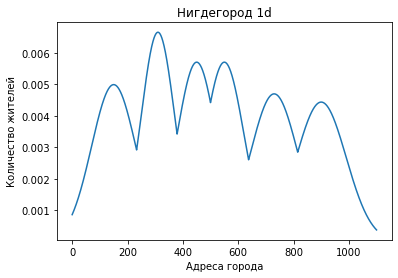

In [3]:
#верхнии и нижние границы холмиков расчитаны пересечением функций в WolframAlpha

y1 = N.pdf(X[:23293], loc=150, scale=80)
y2 = N.pdf(X[23293:37921], loc=310, scale=60)
y3 = N.pdf(X[37921:50000], loc=450, scale=70)
y4 = N.pdf(X[50000:63766], loc=550, scale=70)
y5 = N.pdf(X[63766:81513], loc=730, scale=85)
y6 = N.pdf(X[81513:], loc=900, scale=90)

y = np.concatenate([y1, y2, y3, y4, y5, y6])

sns.lineplot(x=X, y=y)
plt.xlabel('Адреса города')
plt.ylabel('Количество жителей')
plt.title('Нигдегород 1d')


In [4]:
#функции получения индекса слева\справа с заданным расстоянием (100)

def xtoRight(loc, Xdist=100):
    ixdist = loc + 9999
    while X[loc] + Xdist > X[ixdist]:
        ixdist += 1
    return ixdist

def xtoLeft(loc, Xdist=100):
    ixdist = loc - 9999
    while X[loc] - Xdist < X[ixdist]:
        ixdist -= 1
    return ixdist

###  Поиск точек брутфорсом
Код ниже перебирает весь датасет за O(N^2 * 2D), где N-размер города и D-покрытие магазина

Конечно это самое неоптимальное решение, но современное железо считает ответ быстрее чем программист программирует, поэтому норм.

In [9]:
%%time

x1, x2 = 0, 0
maxS = -1
maxSL = []
c1, c2 = 10, 10
l, r = 10_000, 100_000
for i in range(l,r,c1):
    for j in range(i+20_000, r, c2):
        localS = np.sum(y[i-10_000 : i+10_000]) + np.sum(y[j-10_000 : j+10_000])
        if maxS < localS:
            maxS = localS
            maxSL.append(localS)
            x1, x2 = (i, X[i], y[i]), (j, X[j], y[j])

CPU times: total: 9min 18s
Wall time: 9min 20s


In [10]:
x1, x2

((25570, 255.70232456658698, 0.004414942212273772),
 (50000, 500.0045454958682, 0.004416139258280822))

Итого - 256 и 500

### График локальных максимумов для пущей уверенности 

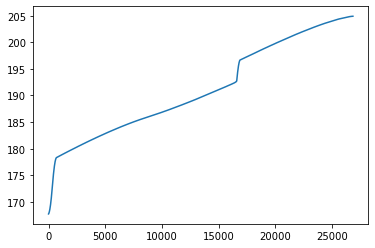

In [8]:
plt.plot(maxSL)

In [111]:
t = 230000
X[t], X[xtoLeft(t)], X[xtoRight(t)]

(1188.005152020608, 1087.999951999808, 1288.0103520414082)

#### Код с помощью которого можно найти точки пересечения холмиков, если лень идти в вольфрам